In [1]:
import sys
import os
# Get the path of the project directory
project_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
# Add the src directory to the Python path
src_dir = os.path.join(project_dir, 'src')
sys.path.append(src_dir)
# Import necessary functions from the eda.py script
from eda import *

In [2]:
# Load the data
df = load_data('../data/sierraleone-bumbuna.csv')

In [4]:
# Summary Statistics: mean, median, standard deviation
summary_stats = summary_statistics(df)
print(summary_stats)

                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-30 12:00:30.000000768     201.957515     116.376337   
min              2021-10-30 00:01:00     -19.500000      -7.800000   
25%              2022-01-29 06:00:45      -2.800000      -0.300000   
50%              2022-04-30 12:00:30       0.300000      -0.100000   
75%              2022-07-30 18:00:15     362.400000     107.000000   
max              2022-10-30 00:00:00    1499.000000     946.000000   
std                              NaN     298.495150     218.652659   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      113.720571     206.643095     198.114691      26.319394   
min       -17.900000       0.000000       0.000000      12.300000   
25%        -3.800000       0.000000       0.000000      23.100000   
50%        -0.100000    

In [5]:
#Data Quality Check:
missing_values, negative_values = data_quality_check(df)
print("Missing Values:\n", missing_values)
print("Negative Values:\n", negative_values)


Missing Values:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Negative Values:
         GHI  DNI  DHI
0      -0.7 -0.1 -0.8
1      -0.7 -0.1 -0.8
2      -0.7 -0.1 -0.8
3      -0.7  0.0 -0.8
4      -0.7 -0.1 -0.8
...     ...  ...  ...
525595 -1.6 -0.1 -2.9
525596 -1.7 -0.1 -3.0
525597 -1.7 -0.1 -3.1
525598 -1.7 -0.2 -3.3
525599 -1.7 -0.1 -3.4

[286728 rows x 3 columns]


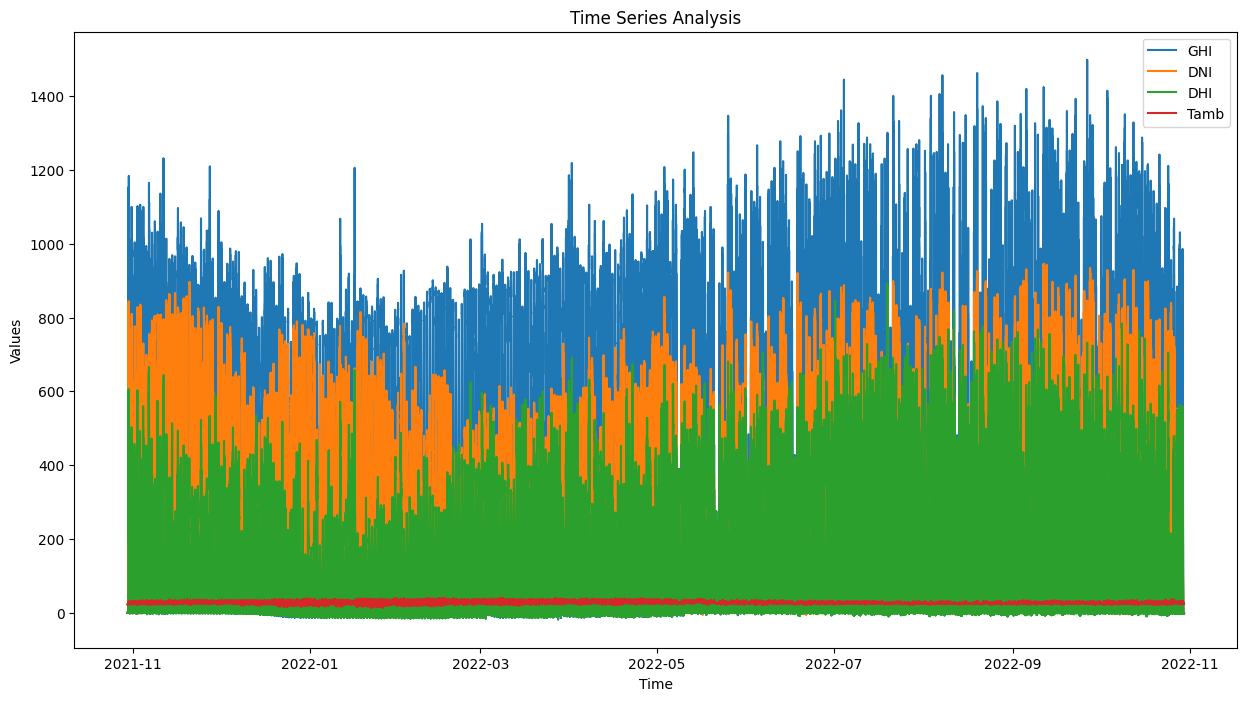

In [6]:
# time_series_analysis(df)
time_series_analysis(df)


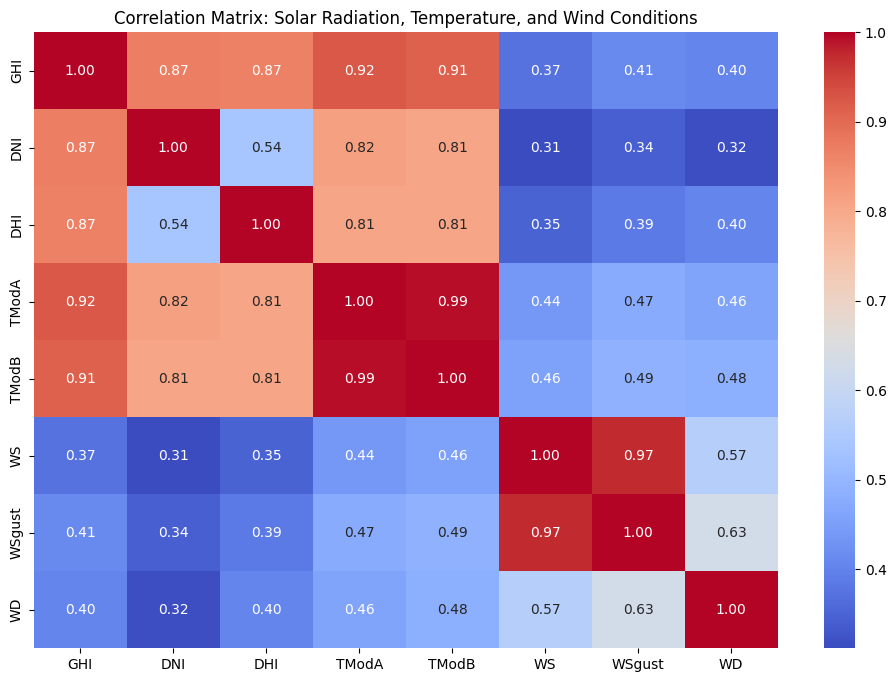

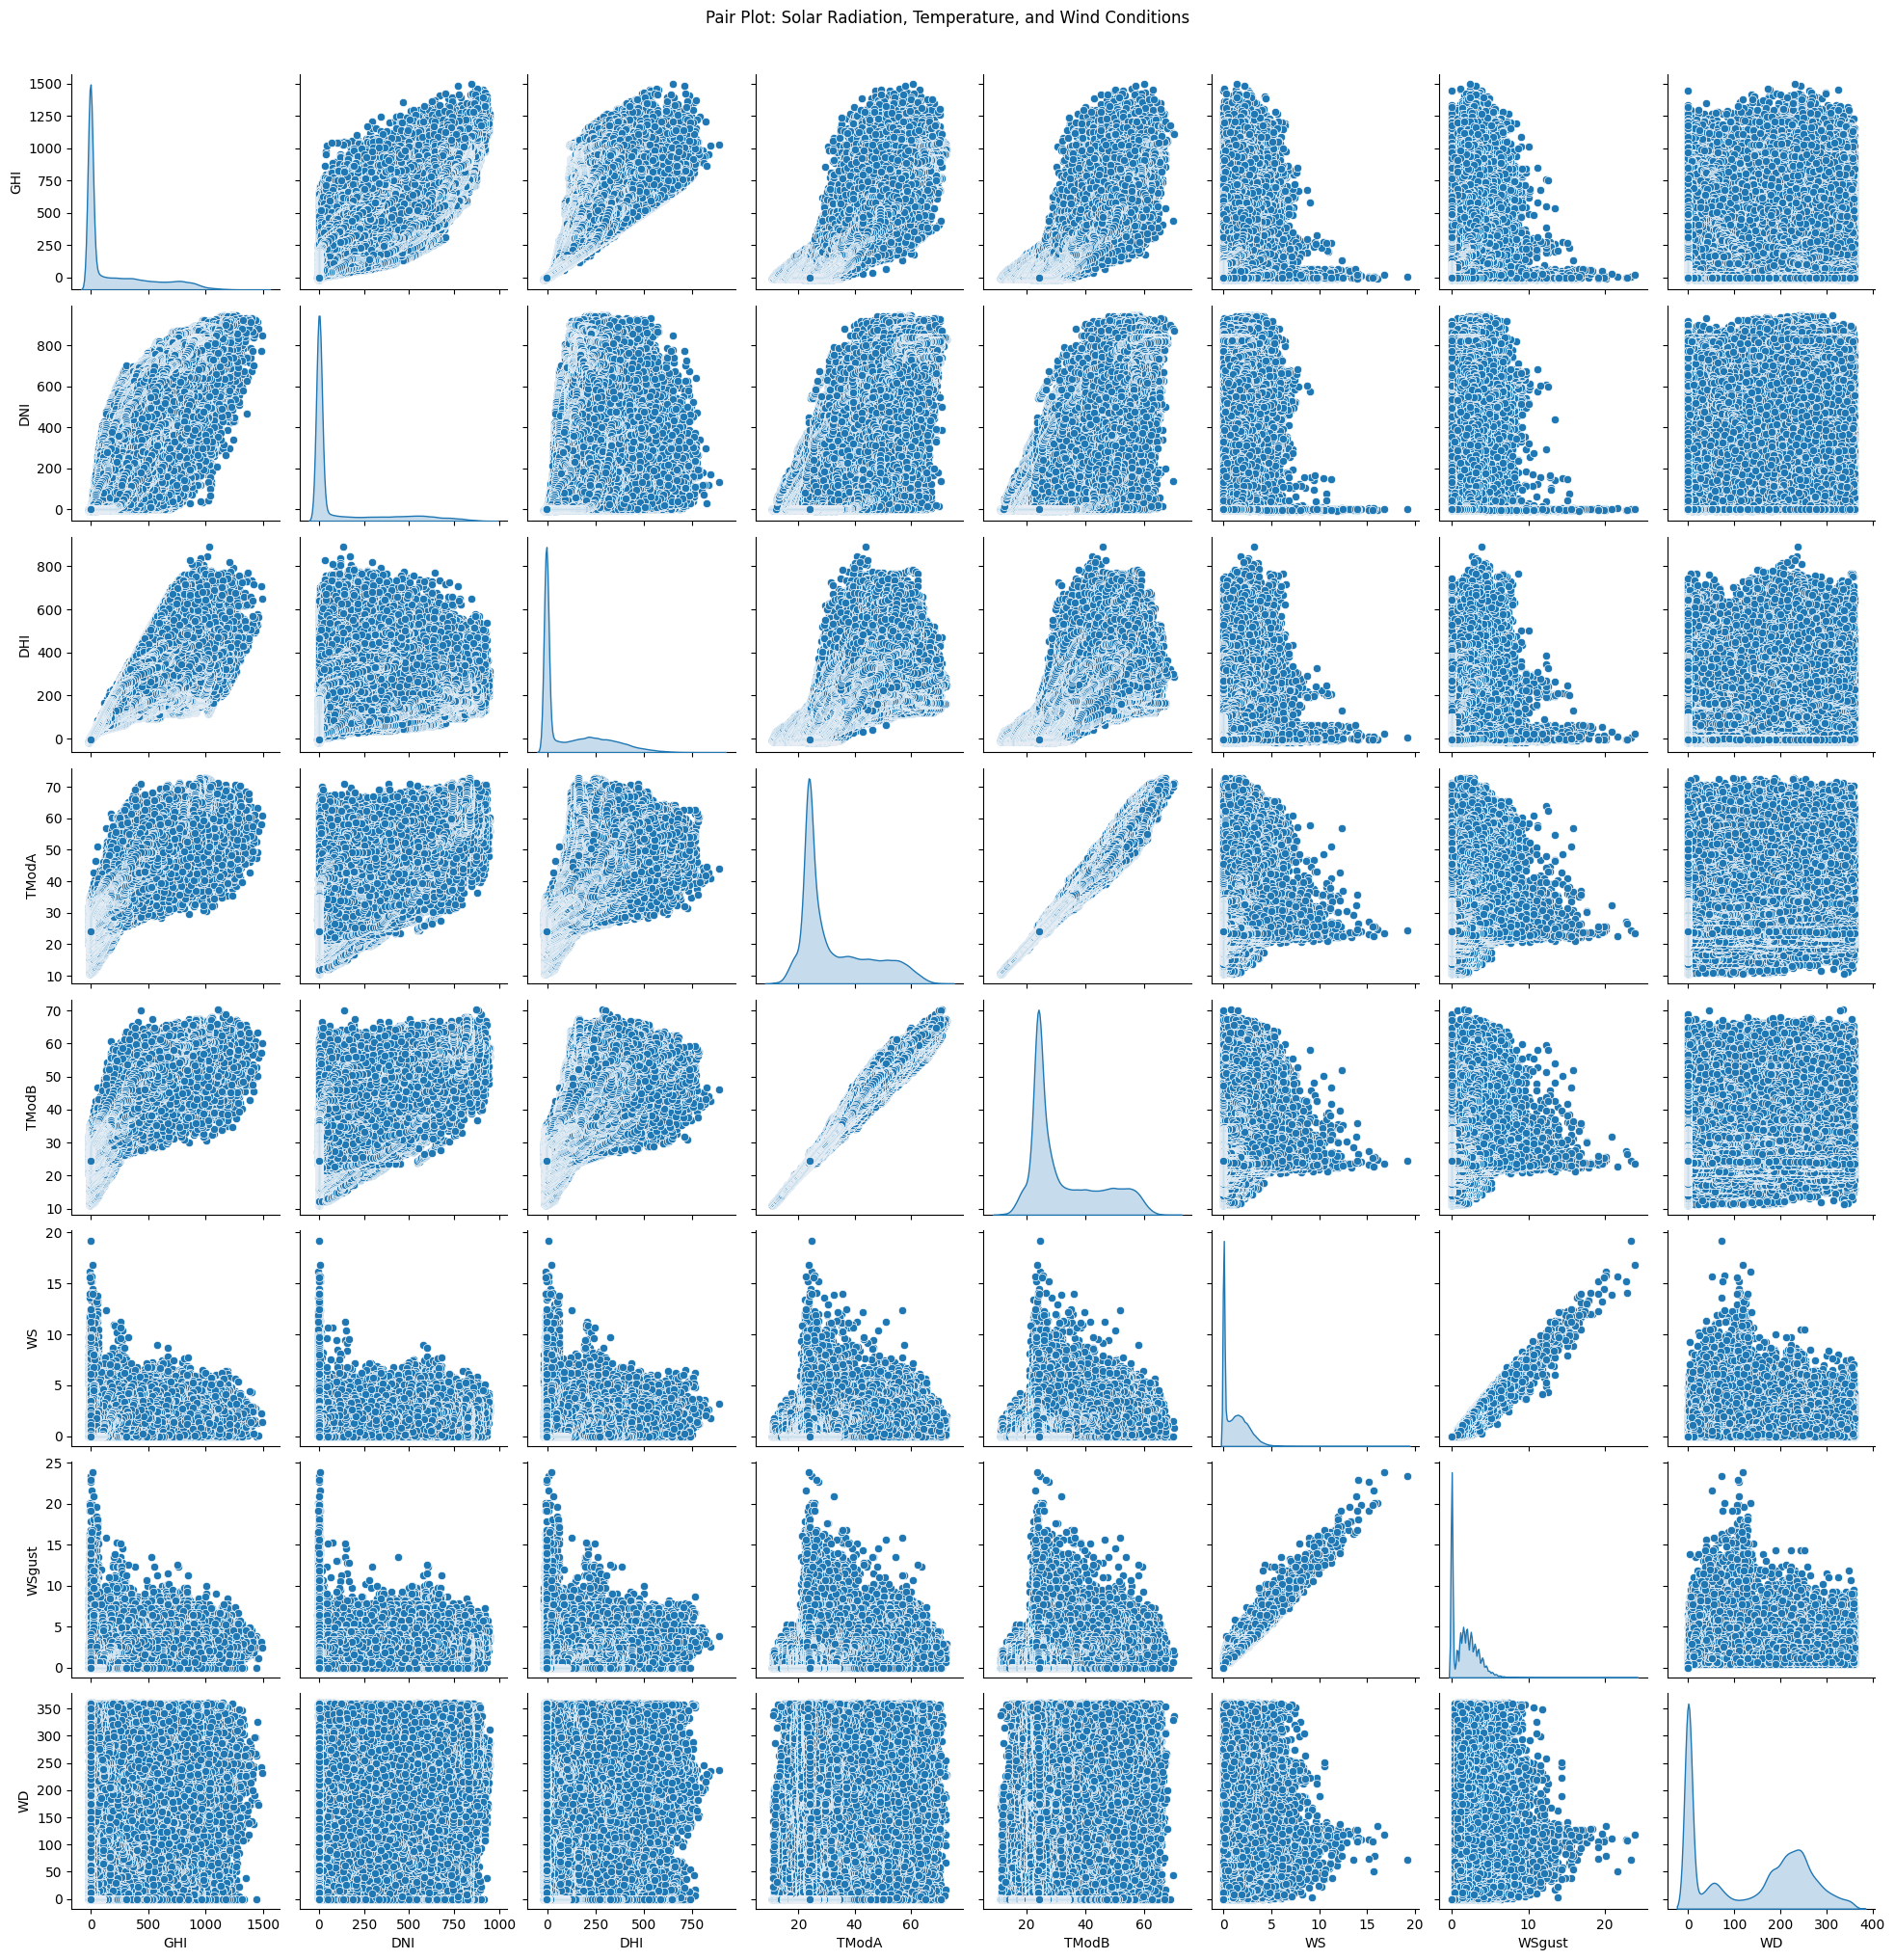

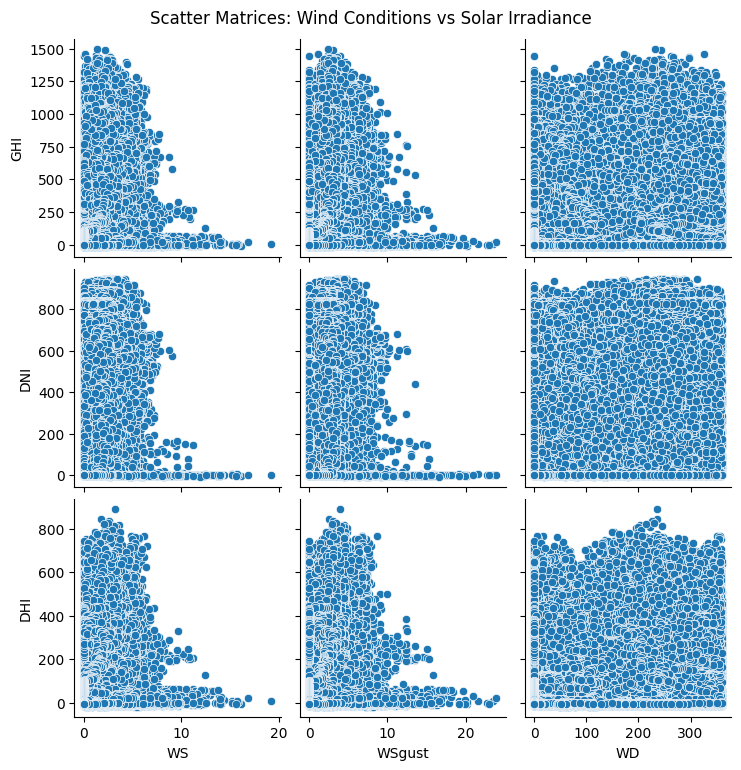

In [7]:
# Correlation Analysis
correlation_analysis(df)

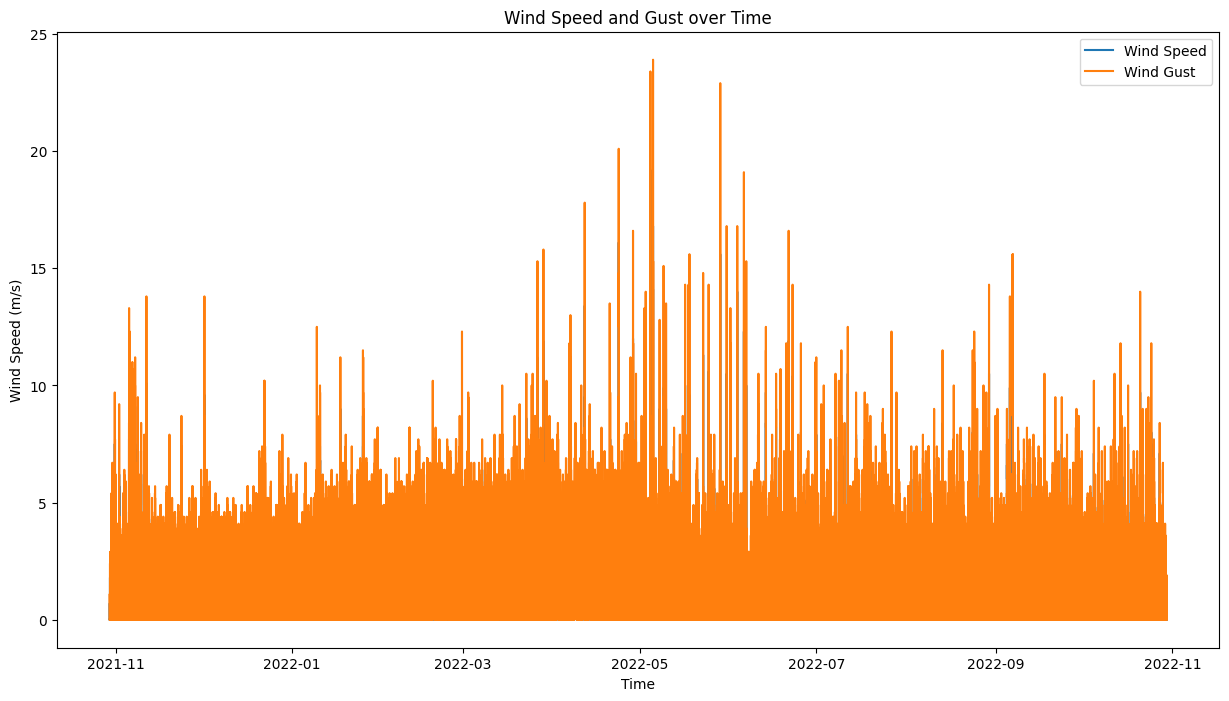

In [3]:
# wind_analysis(df)
wind_analysis(df)

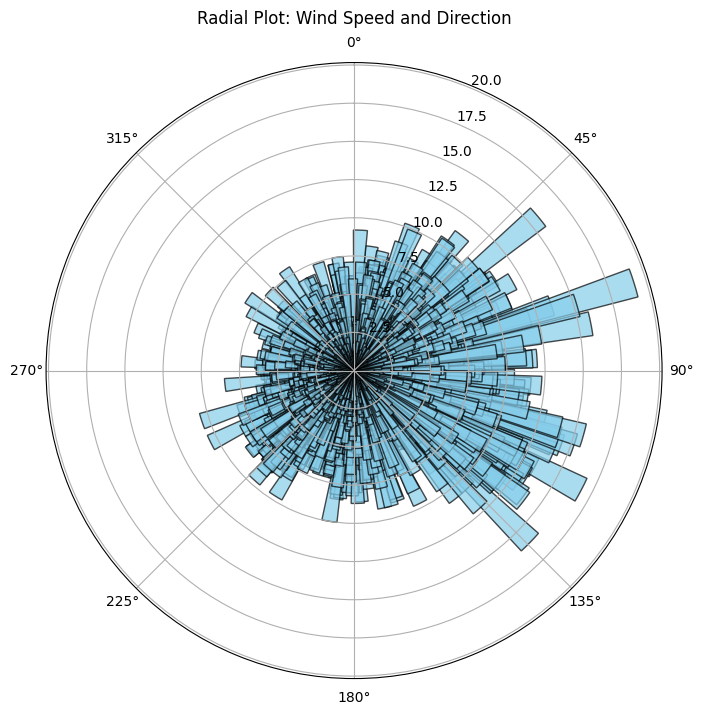

In [3]:
#wind analysis
wind_analysis1(df)

/home/gech/10Acadamy/week-0/SolarRadation/SolarRadationEDA/src/eda.py:107: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/gech/10Acadamy/week-0/SolarRadation/SolarRadationEDA/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


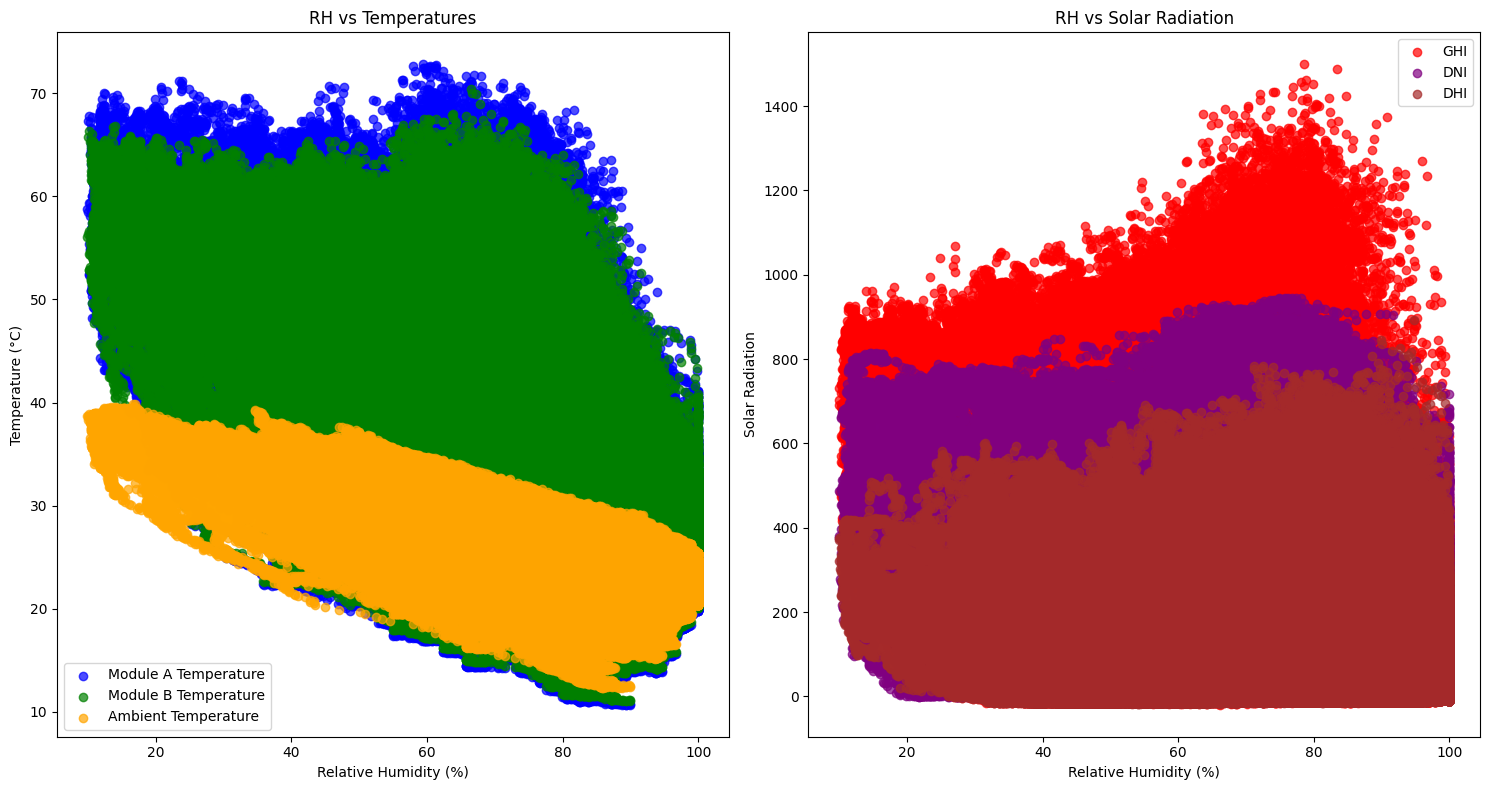

In [4]:
# Temperature Analysis
temperature_analysis(df)

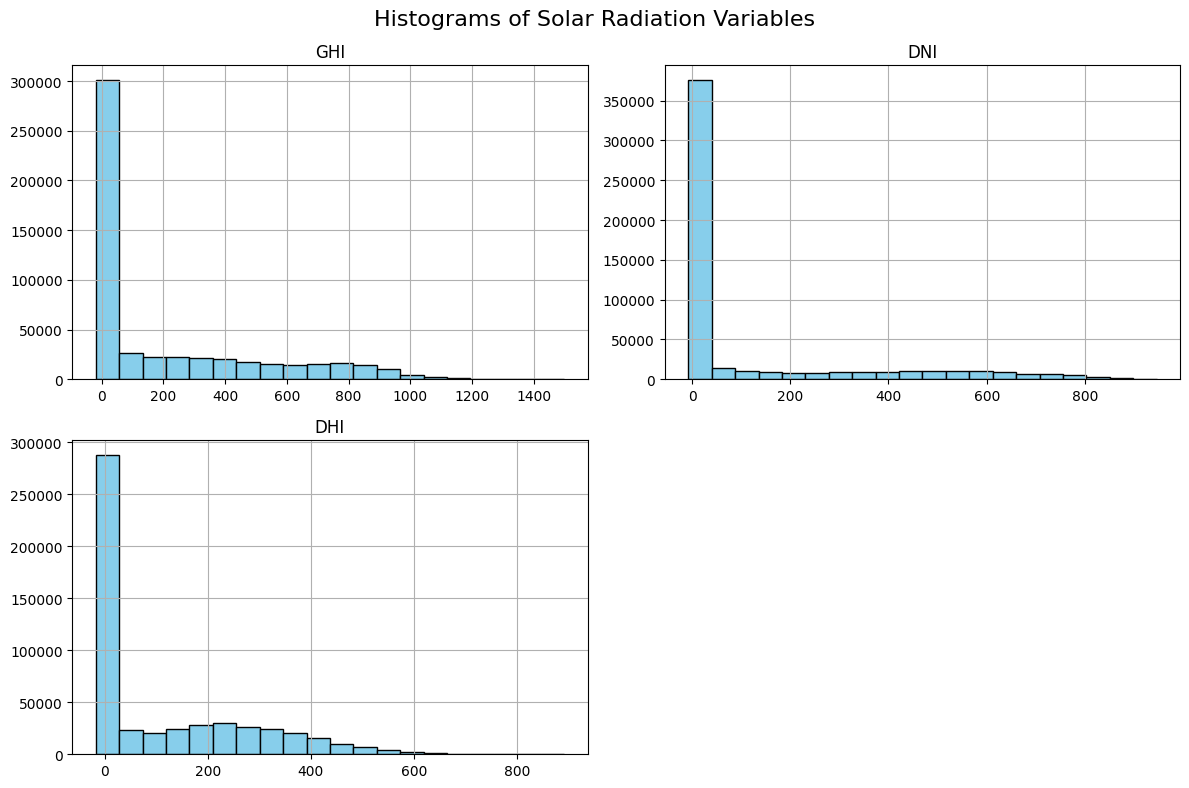

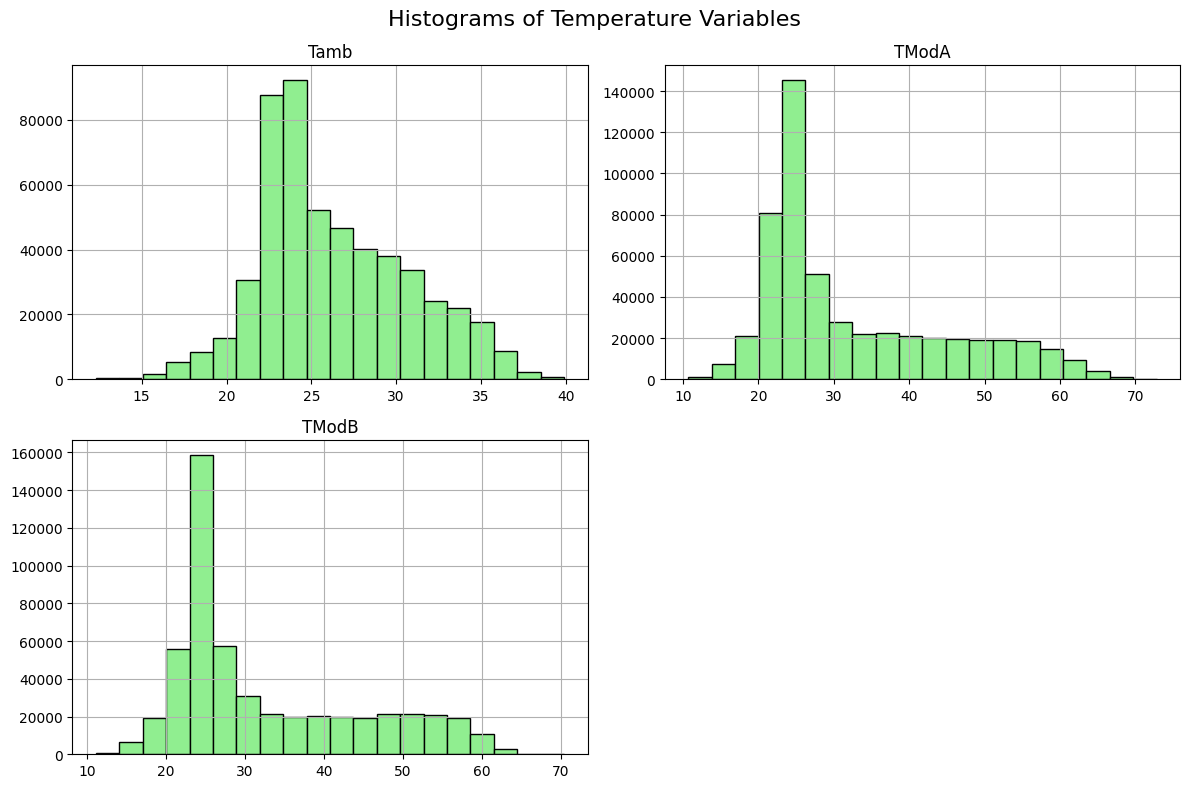

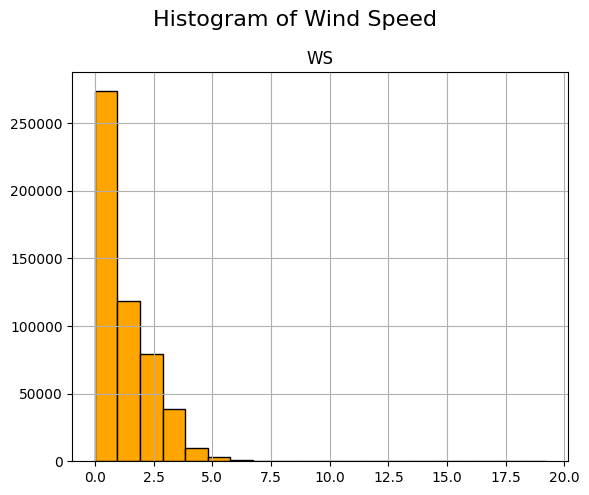

In [5]:
# Historgram Analyis
histograms(df)

In [6]:
# Columns for Z-Score Analysis
columns_to_analyze = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'Tamb', 'WS']

# Perform Z-Score Analysis
result = z_score_analysis(df, columns_to_analyze)

# Display flagged outliers
print(result[result["Outlier_Flag"]])

                 Timestamp    GHI    DNI    DHI   ModA   ModB  Tamb    RH  \
653    2021-10-30 10:54:00  814.0  257.0  594.3  878.0  856.0  25.9  85.3   
654    2021-10-30 10:55:00  826.0  263.5  599.6  883.0  861.0  26.0  85.4   
655    2021-10-30 10:56:00  851.0  285.0  605.9  912.0  890.0  26.0  84.2   
656    2021-10-30 10:57:00  823.0  254.8  603.9  878.0  856.0  26.0  85.3   
657    2021-10-30 10:58:00  810.0  244.5  598.8  864.0  843.0  26.1  85.7   
...                    ...    ...    ...    ...    ...    ...   ...   ...   
522184 2022-10-27 15:05:00  167.2   -0.5  165.1  167.6  160.9  30.4  68.3   
522185 2022-10-27 15:06:00  163.4   -0.6  161.0  165.7  159.2  30.2  67.7   
522194 2022-10-27 15:15:00  183.5    0.3  181.6  173.7  168.7  29.3  70.2   
523792 2022-10-28 17:53:00   31.3   -0.5   30.2   34.3   32.3  28.4  79.5   
523794 2022-10-28 17:55:00   22.8   -0.8   21.4   26.5   25.0  27.9  80.4   

         WS  WSgust  ...  TModB  Comments  GHI_zscore  DNI_zscore  DHI_zsco

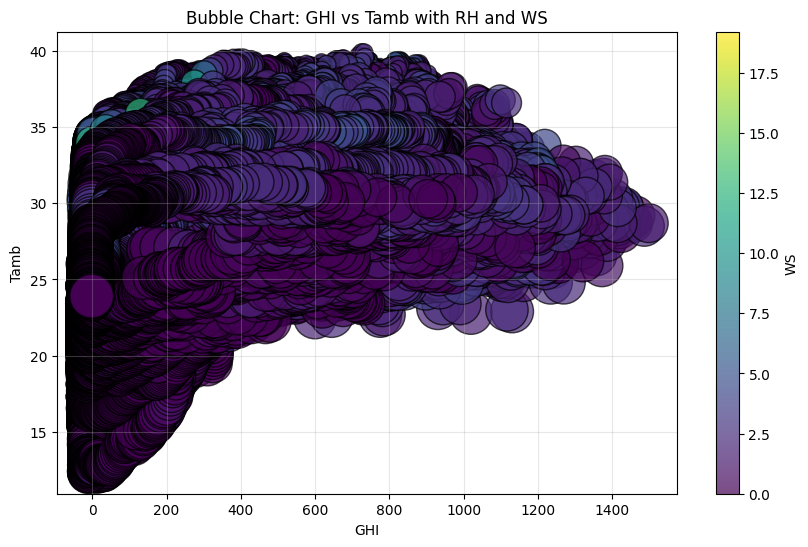

In [7]:
# Create a bubble chart for GHI vs. Tamb, with WS as color and RH as bubble size
bubble_chart(
    df,
    x_col='GHI',
    y_col='Tamb',
    size_col='RH',
    color_col='WS',
    title='Bubble Chart: GHI vs Tamb with RH and WS'
)

In [8]:
# data cleaning 
# Clean the dataset
cleaned_data = data_cleaning(df)
print(cleaned_data)
# Detect outliers in 'GHI'
ghi_outliers = detect_outliers(cleaned_data, 'GHI')
# Remove detected outliers 
cleaned_data = cleaned_data[~cleaned_data.index.isin(ghi_outliers.index)]
print(cleaned_data)

                 Timestamp   GHI  DNI   DHI  ModA  ModB  Tamb    RH   WS  \
432    2021-10-30 07:13:00  17.7  0.0  17.7  20.1  19.2  22.0  98.6  0.2   
433    2021-10-30 07:14:00  18.3  0.0  18.3  20.7  19.9  22.0  98.5  0.1   
434    2021-10-30 07:15:00  18.9  0.0  18.9  21.4  20.5  22.0  98.6  0.2   
435    2021-10-30 07:16:00  19.5  0.0  19.5  22.0  21.1  22.0  98.6  0.4   
436    2021-10-30 07:17:00  20.1  0.0  20.1  22.7  21.8  22.0  98.5  0.1   
...                    ...   ...  ...   ...   ...   ...   ...   ...  ...   
525223 2022-10-29 17:44:00  46.6  0.0  44.8  46.4  44.1  29.0  89.5  0.0   
525224 2022-10-29 17:45:00  45.6  0.0  43.7  45.4  43.1  29.0  89.7  0.0   
525225 2022-10-29 17:46:00  44.5  0.0  42.6  44.4  42.2  29.0  90.0  0.0   
525226 2022-10-29 17:47:00  43.5  0.0  41.6  43.4  41.2  29.0  90.5  0.0   
525227 2022-10-29 17:48:00  42.4  0.0  40.5  42.4  40.2  29.1  90.8  0.0   

        WSgust  ...  TModA  TModB  GHI_zscore  DNI_zscore  DHI_zscore  \
432        0.7